# Task-3 Exploratory Data Analysis -Retail

Task:
    
    1. Perform EDA on dataset "SampleSuperstore"
    2. As a business manager, try to find out the weak areas where you can work to make more profit.
    3. What all business problem you can derive by exploring data?

dataset link: https://bit.ly/3i4rbWl

Let's start working with data.

Let us first import the libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import superstore data using pandas read_csv command.
data=pd.read_csv("C:/Users/pcc/Downloads/SampleSuperstore.csv")
data.head() # View first 5 rows of our dataset.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail() # last five rows of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#view shape of dataframe that contain No. of rows and No. of columns
data.shape

(9994, 13)

In our dataset, there are 9994 rows and 13 columns are available.

In [7]:
#let's view the columns
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
#view the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#check if there are null values in data
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values over the entire data.

View unique categories in data.

In [11]:
print(data["Category"].unique())

['Furniture' 'Office Supplies' 'Technology']


In [12]:
print(data["Sub-Category"].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [13]:
NO_of_Cate=data["Sub-Category"].nunique()
print("Categories are divided into", NO_of_Cate, "subcategories.")

Categories are divided into 17 subcategories.


In [14]:
print(data["State"].nunique()) #to view the number of unique entries in th column by using nunique()

49


In [15]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [16]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [17]:
data["Country"].unique()

array(['United States'], dtype=object)

In [18]:
data["City"].nunique()

531

In [19]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [21]:
#Let's view statistical description
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Focus On Losses:
    
    Now let's create a loss dataframe. Create data frame of negative values of profit that is losses.
    

In [22]:
#create loss dataframe of profit less than zero.
loss=data[data["Profit"]<0]
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [23]:
#View the shape of loss dataframe
loss.shape

(1871, 13)

Loss dataframe contain 1871 rows and 13 columns.

From that we can see that, there are 9994 rows are in total data and we have 1871 rows that are in loss dataframe.

In [24]:
loss.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,55991.122929,250.511574,3.762694,0.480887,-83.448042
std,26041.501999,715.067296,2.141347,0.235080,284.423422
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000
25%,33024.000000,12.503000,2.000000,0.200000,-58.660950
50%,60623.000000,71.088000,3.000000,0.400000,-18.088200
75%,77095.000000,284.922000,5.000000,0.700000,-6.261500
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500


In [25]:
#to check total loss.
total_loss=np.negative(loss["Profit"].sum())
print("Total loss=", total_loss)

Total loss= 156131.2857


In [26]:
loss.groupby(by="Segment").sum()


,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,17522858,89650.3705,1198,150.98,-26398.3669


We can see that, Home Office has more losses with maximum discount.
To make more profit provider need to reduce the discounts.

In [29]:
loss.groupby(by="City").sum().sort_values("Profit").head(10)

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,4783713,70460.5510,892,115.30,-19590.7411
Houston,14256474,37640.7304,683,104.14,-14785.3668
Chicago,9397492,19910.0120,541,88.20,-11120.6271
San Antonio,2580831,17395.1450,139,17.10,-7831.0254
Lancaster,683904,7699.2420,71,9.40,-7632.4946
Burlington,108868,12044.8740,19,2.00,-5999.3318
Dallas,5487794,9994.0562,280,39.30,-4208.5218
Jacksonville,1237176,31146.2710,154,18.85,-4059.9857
New York City,400828,19533.8020,132,12.20,-3966.0226


The above list is the top 10 cities where loss is high.

In [31]:
data.groupby(["State"]).sum()["Sales"].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

The above list is the top 10 states where sale is low.

In [32]:
loss.sort_values(["Sales"]).groupby(by="Category").mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,59700.907563,361.184295,3.714286,0.367143,-85.344690
Office Supplies,54746.056433,103.395796,3.865688,0.617607,-63.899840
Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322


We see that, the sale of technology is high, still it bear most losses, may be due to less discounts.
It's better to give some extra discount on Technology.

In [33]:
data.sort_values(["Segment"]).groupby("Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


The less profit occure in the corporate segment. It's better to focus on Corporate segment.

In [34]:
loss["Sub-Category"].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [35]:
loss.groupby(by="Sub-Category").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,5286382,10958.8000,330,18.20,-930.6265
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,701930,149.2800,55,2.40,-33.1952
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Machines,2236261,72456.2530,157,25.60,-30118.6682
Phones,6105294,35797.8400,476,46.60,-7530.6235


We can observe that Binders category has more loss as compare to other followed by machines category and table category.

Binder are more getting sold with less discounts, So to increase profit, give better discounts on which are getting less sold, ao that even they will start getting sold more.


In [37]:
data.groupby(by="Region").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


As we see that, profit from South region is less than other regions. So to increase the profit we need to focus on South Region.

# Visualization:

In [38]:
import matplotlib.pyplot as plt

In [39]:
plt.rcParams["figure.figsize"]=(15,3)

Text(0.5, 1.0, 'Sub-Category Vs Sales')

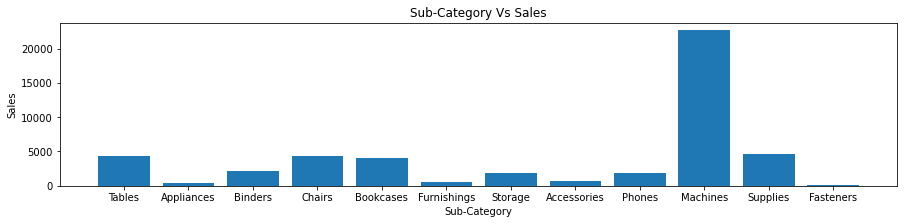

In [40]:
plt.bar(loss["Sub-Category"],loss["Sales"])
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.title("Sub-Category Vs Sales")

Above bar plot show that, the Fasteners, Appliances, Furnishings, Accessories has less profit than other, so we need to focus on that.

Text(0.5, 1.0, 'Sub-Category Vs Sales')

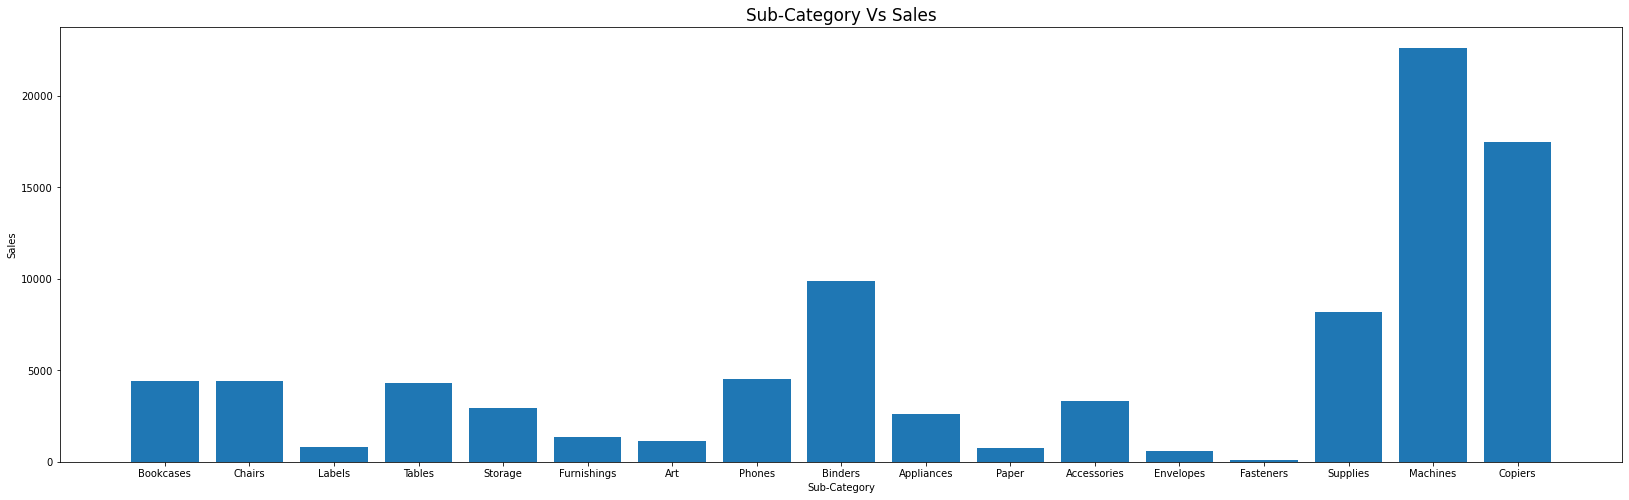

In [41]:
plt.rcParams["figure.figsize"]=(28,8)
plt.bar(data["Sub-Category"],data["Sales"])
plt.rcParams.update({'font.size':14})
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.title("Sub-Category Vs Sales")

When we compare the overall supermarket data, Fasteners, LAbels, Art, Envelopes, Furnishing, etc sub-categories has less sales, so we need to focus on that and improve it's sale. 

Text(0, 0.5, 'Discount')

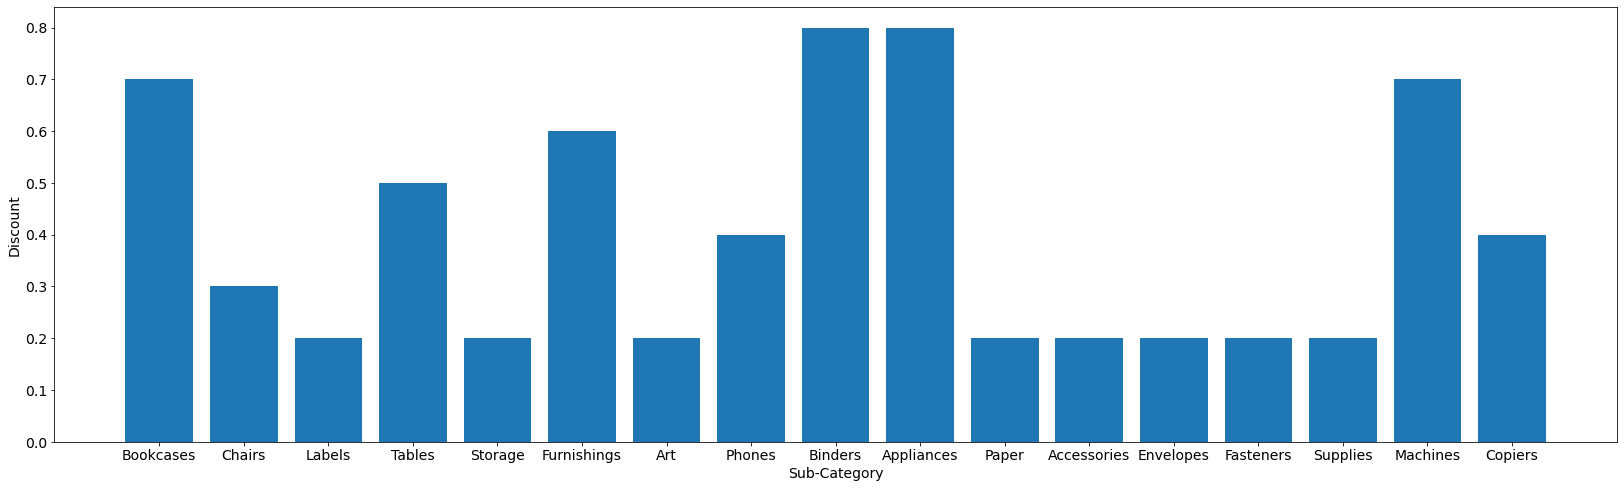

In [42]:
plt.rcParams["figure.figsize"]=(28,8)
plt.bar(data["Sub-Category"],data["Discount"])
plt.rcParams.update({"font.size":14})
plt.xlabel("Sub-Category")
plt.ylabel("Discount")

Text(0, 0.5, 'Sales')

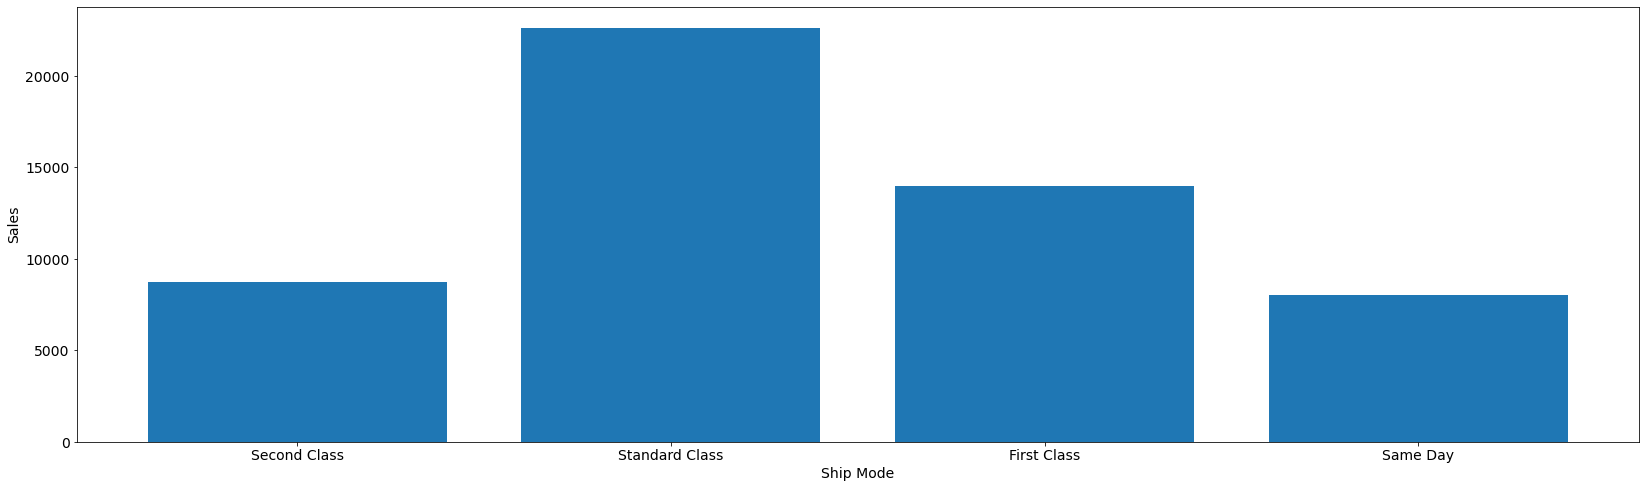

In [43]:
plt.rcParams["figure.figsize"]=(28,8)
plt.bar(data["Ship Mode"],data["Sales"])
plt.rcParams.update({"font.size":14})
plt.xlabel("Ship Mode")
plt.ylabel("Sales")

Here see that, sales is high if ship mode is Standard class and low if it is Same day or second class.

In [44]:
import seaborn as sns

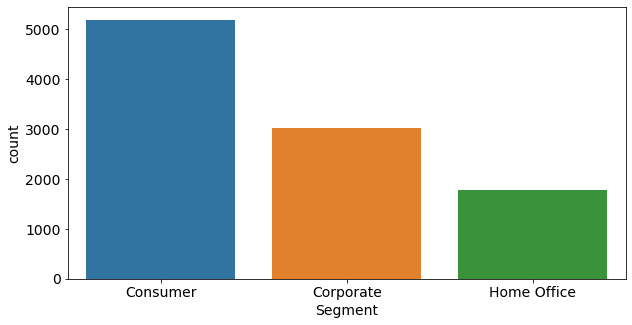

In [35]:
plt.rcParams["figure.figsize"]=(10,5)
sns.countplot(x=data.Segment)
plt.show()

In above plot we see that, the count is low in Home Office segment, so we need to improve strategies in this segments.

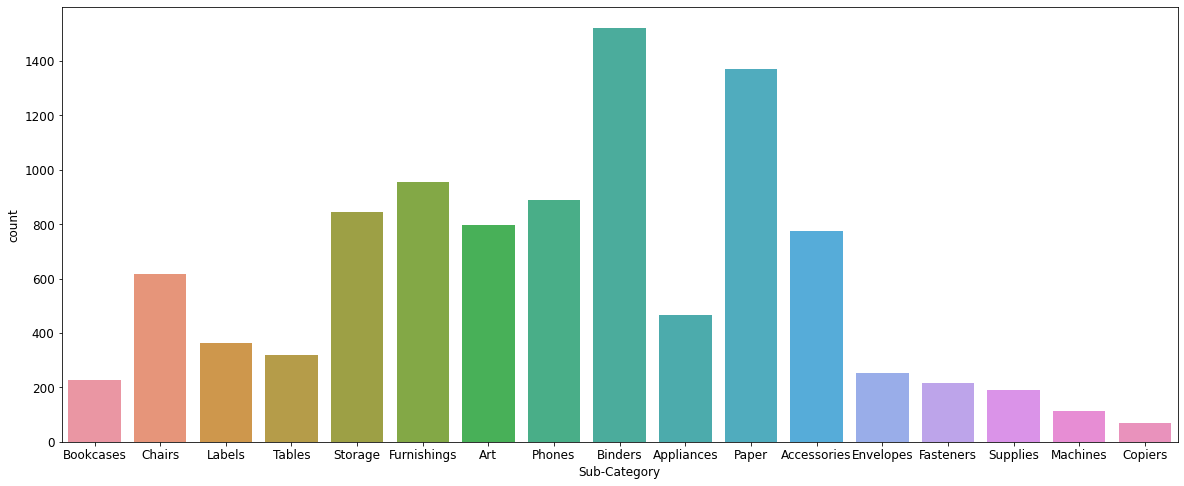

In [42]:
plt.rcParams["figure.figsize"]=(20,8)
plt.rcParams.update({"font.size":12})
sns.countplot(x="Sub-Category",data=data)
plt.show()

From above plot, it is clear that we need to focus on Copiers and Machines.

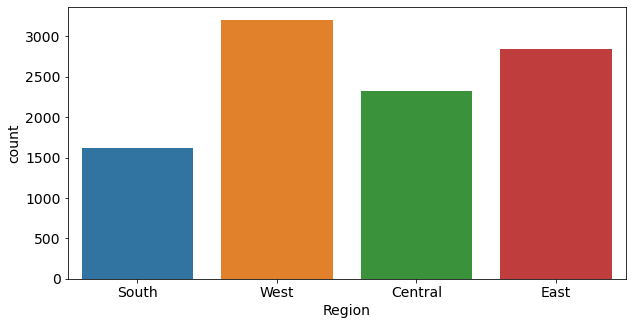

In [41]:
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams.update({"font.size":14})
sns.countplot(x="Region",data=data)
plt.show()

South region need more improvement than other regions.

In [43]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


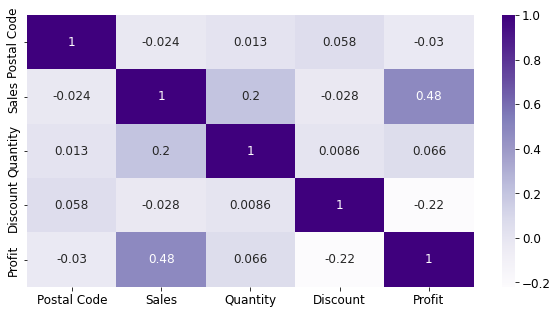

In [47]:
sns.heatmap(data.corr(),cmap="Purples",annot=True)
plt.rcParams["figure.figsize"]=(10,5)

The above heatmap tells us that,

Sales and profit are moderately correlated.

Discount and Profit are negatively correlated.

# Overall Analysis of Store

1. The main reason of loss is "Discount", in some areas more discount lead more loss, and in some areas less discount lead to more loss. Hence it need improvement.

2. Need to focus on sales of Sub-categories, in which sale is low. 

3. The Home office Segment needs more improvment.

# Thank You!